In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x22de181ecf0>)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
medical_df=pd.read_csv("medical.csv")
medical_df
medical_df.info()
medical_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(10,6)

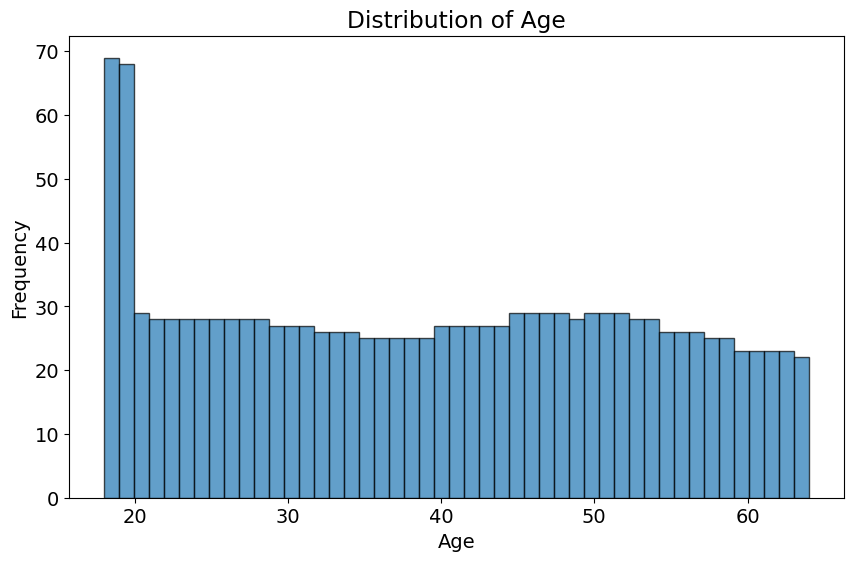

In [4]:
plt.hist(medical_df["age"],bins=47,edgecolor="black",alpha=0.7)   
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

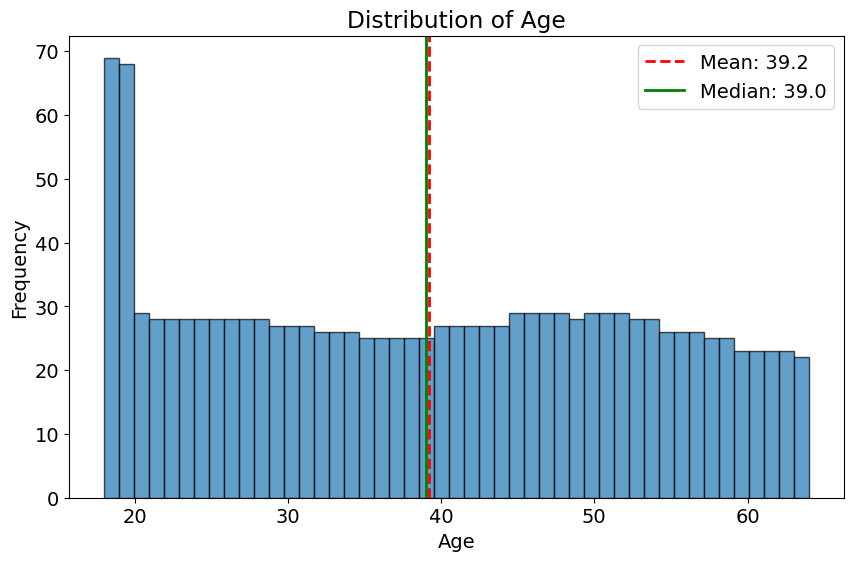

In [5]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for mean/median if 'medical_df' is not a pandas DataFrame

# --- 1. Calculate Statistics (Assuming medical_df is a pandas DataFrame) ---
data = medical_df["age"]
mean_age = data.mean()
median_age = data.median()

# --- 2. Plot the Histogram ---
plt.hist(data, bins=47, edgecolor="black", alpha=0.7) 

# --- 3. Add Mean and Median Lines (Concise Visualization) ---
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-', linewidth=2, label=f'Median: {median_age:.1f}')

# --- 4. Add Labels and Legend ---
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Text(0, 0.5, 'count')

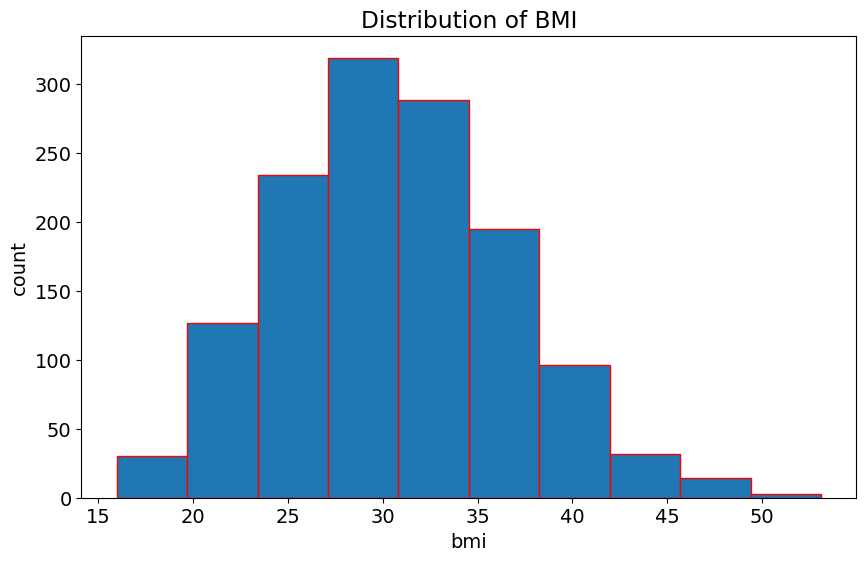

In [6]:
import matplotlib.pyplot as plt
plt.hist(medical_df["bmi"],edgecolor="red")
plt.title("Distribution of BMI")
plt.xlabel("bmi")
plt.ylabel("count")

Text(0, 0.5, 'count')

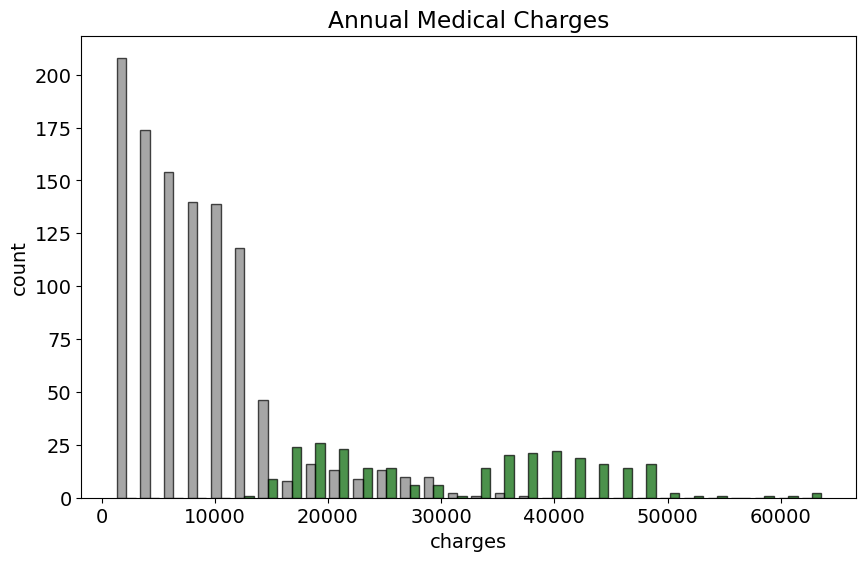

In [3]:
charges_smoker_yes = medical_df[medical_df['smoker'] == 'yes']['charges']
charges_smoker_no = medical_df[medical_df['smoker'] == 'no']['charges']
plt.hist(
    [charges_smoker_no, charges_smoker_yes], # Pass the data as a list
    bins=30,                                 # Adjust bins for detail
    color=['gray', 'darkgreen'],             # Colors for 'no' and 'yes'
    edgecolor='black',
    alpha=0.7,                               # Use transparency to show overlap
    label=['no', 'yes']                      # Labels for the legend
)
plt.title("Annual Medical Charges")
plt.xlabel("charges")
plt.ylabel("count")

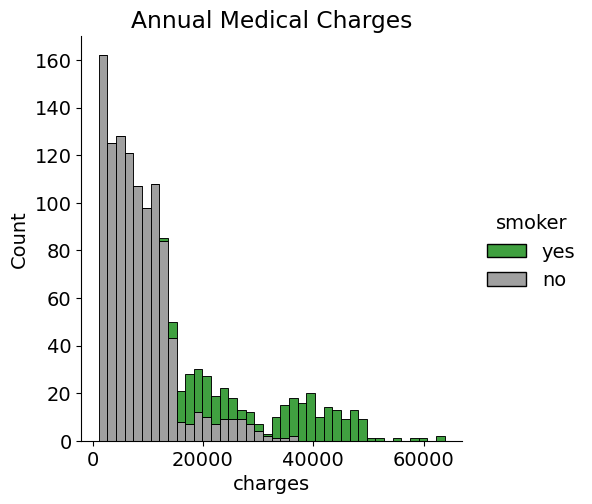

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using Seaborn's displot function with kind='hist' and hue='smoker'
sns.displot(
    data=medical_df, 
    x='charges', 
    hue='smoker', 
    kind='hist', 
    bins=40,
    palette={'yes': 'green', 'no': 'gray'},
    multiple='stack' # or 'layer' to stack/overlap them
)
plt.title("Annual Medical Charges")
plt.show()

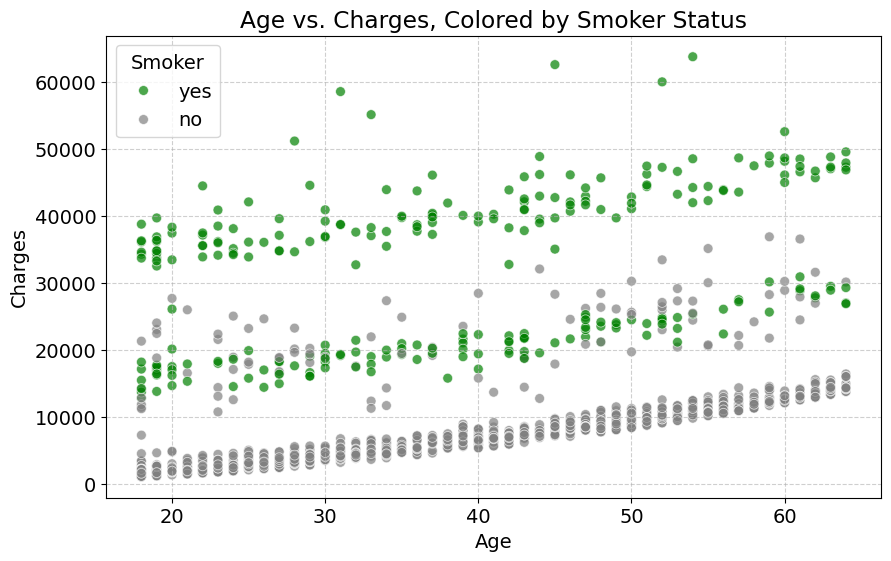

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the custom color palette
custom_palette = {'yes': 'green', 'no': 'gray'}

# Create the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=medical_df,
    x='age',
    y='charges',
    hue='smoker',
    palette=custom_palette,  # Apply the custom colors
    s=50,                    # Adjust marker size for visibility
    alpha=0.7                # Add transparency to see overlapping points
)

plt.title('Age vs. Charges, Colored by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.grid(True, linestyle='--', alpha=0.6) # Add a light grid
plt.show()

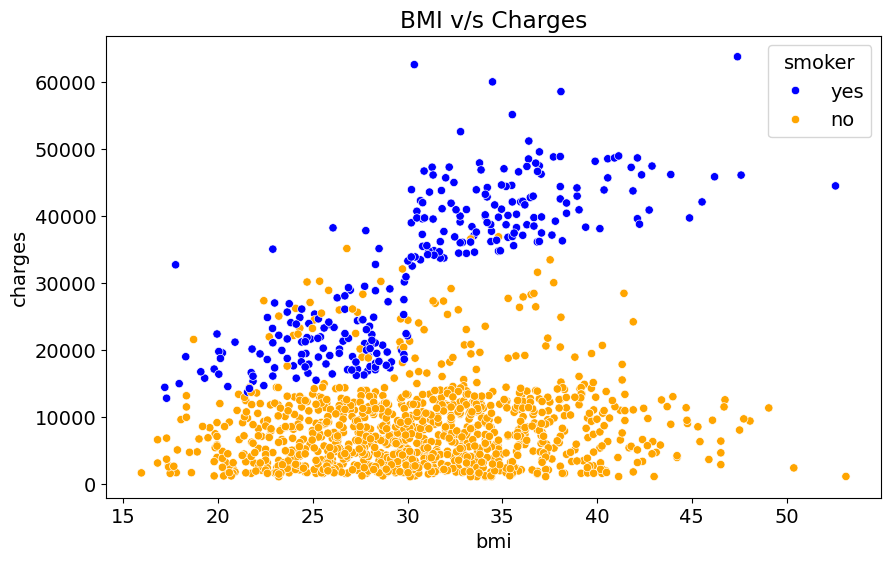

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=medical_df,
    x='bmi',
    y='charges',
    hue='smoker',
    palette={'yes': 'blue', 'no': 'orange'}
    
)
plt.title("BMI v/s Charges")
plt.show()

C:\Users\faiza\AppData\Local\Temp\ipykernel_28664\3533346817.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


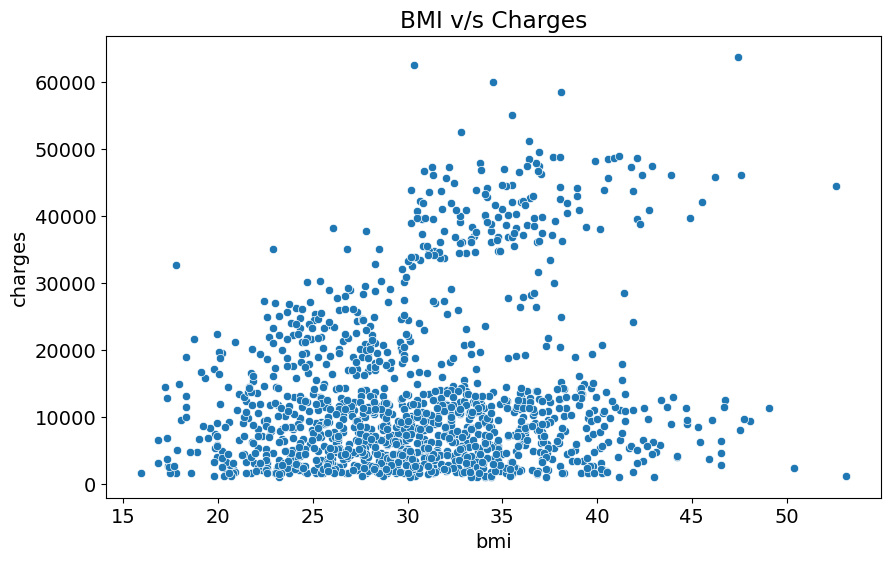

In [11]:
plt.figure(figsize=(10, 6))
smokers_df=medical_df[medical_df['smoker']=='yes']
sns.scatterplot(
    data=medical_df,
    x='bmi',
    y='charges',
    
    palette={'yes': 'blue', 'no': 'orange'}
    
)
plt.title("BMI v/s Charges")
plt.show()

In [4]:
# medical_df.charges.corr(medical_df.age)
smokers_values={'yes':1,'no':0}
smokers_numeric=medical_df.smoker.map(smokers_values)
medical_df.charges.corr(smokers_numeric)

0.7872514304984767

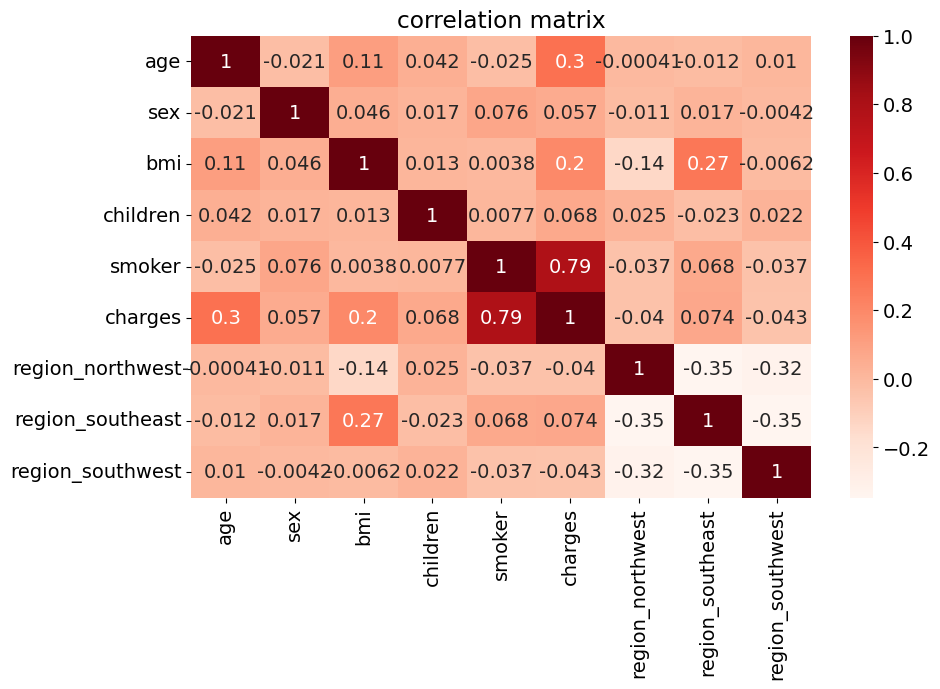

In [7]:
# Create a copy to avoid SettingWithCopyWarning
df_encoded = medical_df.copy()

# Map the 'sex' column
df_encoded['sex'] = df_encoded['sex'].map({'female': 0, 'male': 1})

# Map the 'smoker' column
df_encoded['smoker'] = df_encoded['smoker'].map({'no': 0, 'yes': 1})
df_final = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)
correlation_matrix = df_final.corr()
sns.heatmap(correlation_matrix,cmap='Reds',annot=True)
plt.title('correlation matrix')
plt.show()

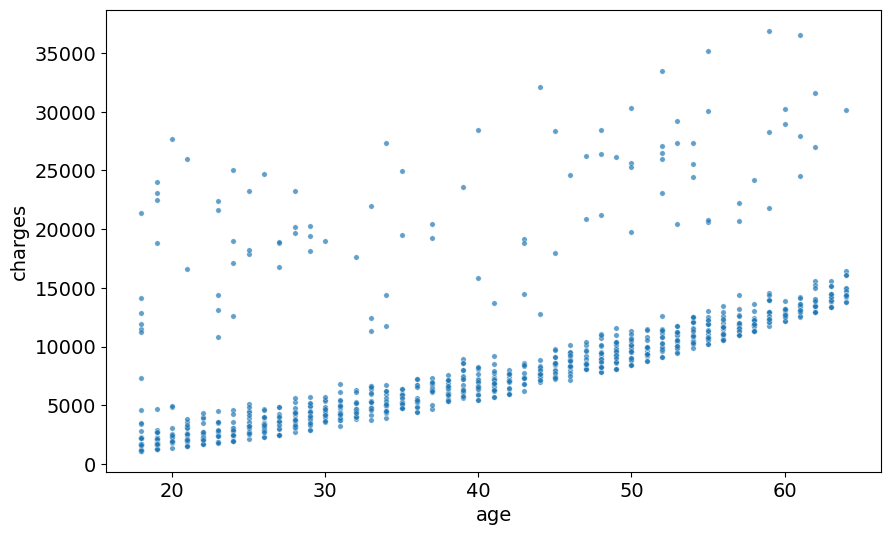

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
non_smoker_df=medical_df[medical_df['smoker']=="no"]
sns.scatterplot(
    data=non_smoker_df,
    x='age',
    y='charges',
    alpha=0.7,
    s=15

)
plt.show()

In [10]:
def estimate_charges(age,w,b):
    return w*age+b
w=50
b=100
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)


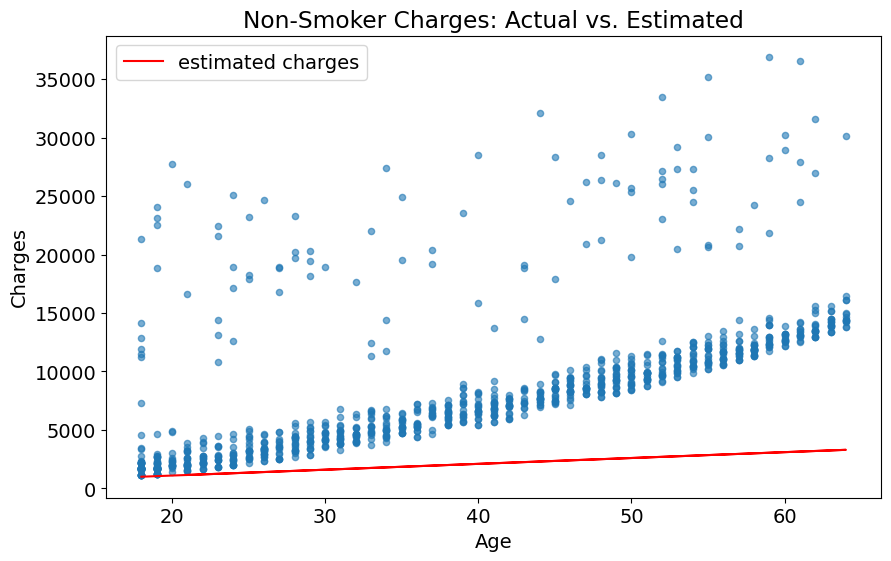

In [12]:
import matplotlib.pyplot as plt
import numpy as np

target=non_smoker_df.charges
plt.plot(
    ages,
    estimated_charges,
    color='red',
    label='estimated charges'

)
plt.scatter(
    ages,
    target,
    alpha=0.6,
    s=20
)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Non-Smoker Charges: Actual vs. Estimated')
plt.legend()
plt.show()

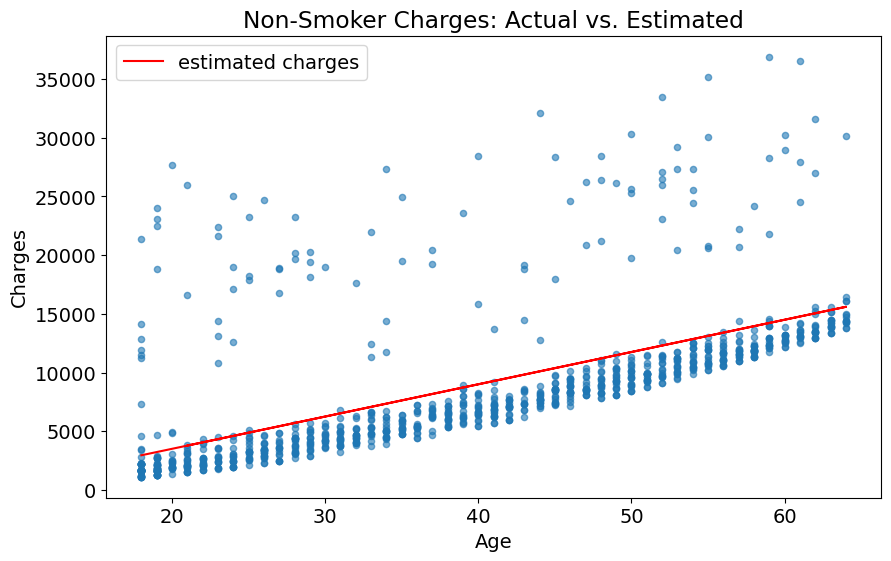

In [13]:
def try_parameter (ages,w,b):
    return w*ages+b
new_w = 275
new_b = -2000
estimatedd_charges = try_parameter(ages, new_w, new_b)

plt.plot(
    non_smoker_df['age'],
    estimatedd_charges,
    color='red',
    label='estimated charges'

)
plt.scatter(
    non_smoker_df['age'],
    target,
    alpha=0.6,
    s=20
)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Non-Smoker Charges: Actual vs. Estimated')
plt.legend()
plt.show()



In [14]:
target=non_smoker_df.charges
target




1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [15]:
prediction=estimated_charges
prediction

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [16]:
medical_df.charges.corr(medical_df.age)


0.2990081933306476

In [17]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362884

In [18]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984767

RMSE measures how far off your model’s predictions are from the actual values — in other words, it tells you the average prediction error in the same units as the target variable.

In [19]:
import numpy as np
def rmse(target,predictiom):
    return np.sqrt(np.mean(np.square(target-prediction)))
w=50
b=100
rmse(275,-2000)


1927.3774499527763

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
model.fit(inputs,targets)
model.predict(np.array([[23],
                       [63],
                       [24]]))
 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855, 14745.2609518 ,  4322.55335138])

In [21]:
rmse(targets,prediction)

8461.949562575493

In [26]:
model.coef_


array([267.24891283])

In [42]:
model.intercept_

-2091.4205565650827

In [22]:
input,target=non_smoker_df[['age','bmi']],non_smoker_df['charges']
model=LinearRegression().fit(input,target)
model.predict([[25,24]])
# loss=rmse(targets,prediction)
# print('loss:',loss)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4548.0938033])

In [28]:
non_smoker_df.charges.corr(non_smoker_df.children)


0.13892870453542197

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
fig=px.strip(
    non_smoker_df,
    x='children',
    y='charges',
    title="Children vs charges"

)
fig.update_traces(marker_size=4,marker_opacity=0.7)
fig.show()

In [23]:
from sklearn.linear_model import LinearRegression
inputs,targets=non_smoker_df[['age','bmi','children']],non_smoker_df.charges
model=LinearRegression().fit(inputs,targets)
model.predict([[25,24,1]])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4530.41766991])

In [24]:
import pandas as pd
medical_df['smoker_encoded']=medical_df['smoker'].map({'no':0,'yes':1})
print(medical_df[['smoker', 'smoker_encoded']].head())

  smoker  smoker_encoded
0    yes               1
1     no               0
2     no               0
3     no               0
4     no               0


In [30]:
inputs,targets=medical_df[['age','bmi','children','smoker_encoded']],medical_df.charges
model=LinearRegression().fit(inputs,targets)
model.predict([[25,24,1,1]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26352.80413857])

In [32]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']

<Axes: xlabel='region', ylabel='charges'>

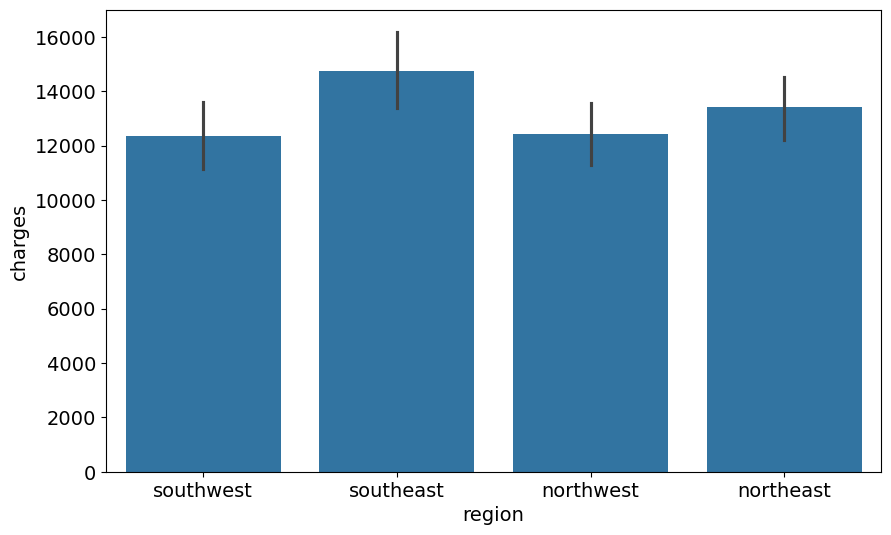

In [33]:
sns.barplot(
    data=medical_df,
    x='region',
    y='charges'
)

A OneHotEncoder in Scikit-learn (often abbreviated as OHE or OneHotEncoder) is a preprocessing tool used to convert categorical data (data that represents groups or labels) into a numerical format that machine learning algorithms can understand and process.

In [34]:
medical_df["sex_code"]=medical_df["sex"].map({'female': 0, 'male': 1})

In [35]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])

one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot
medical_df[['northeast','northwest','southeast','southwest']]=one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_encoded,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [36]:
input_cols=['age','bmi','children','smoker_encoded','sex_code','northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict([[25,24,1,1,1,1,0,0,0]])
print(predictions)


[26816.23385159]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [37]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'bmi', 'children']
scaler=StandardScaler()
scaler.fit(medical_df[numeric_cols])
scaler.mean_
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [39]:
scaled_inputs=scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [45]:
cat_cols = ['smoker_encoded', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values
print(categorical_data)




[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]]


In [43]:
print(medical_df.columns.tolist())

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'smoker_encoded', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']


In [54]:
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)
targets=medical_df.charges
model=LinearRegression().fit(inputs,targets)
new_Customer=[[28,30,2,1,0,0,0,0,1]]
scaler.transform([[28,30,2]])
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,0,0,1]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([29184.])